# Fitting polynomials
#### Zain Naqavi

This code will fit a polynomial function to experimental data.

In [1]:
# Interactive plot
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


Temperature (Celcius):
 [80. 77. 74. 71. 68. 65. 62. 59. 56. 53. 50. 47. 44. 41. 38. 35. 32. 29.
 26. 23. 20. 17. 14. 11.  8.  5.]

Measured Voltage (V):
 [0.389 0.421 0.467 0.512 0.571 0.597 0.641 0.702 0.754 0.81  0.872 0.94
 1.012 1.091 1.166 1.248 1.322 1.42  1.488 1.566 1.653 1.735 1.807 1.869
 1.94  2.   ]


<IPython.core.display.Javascript object>


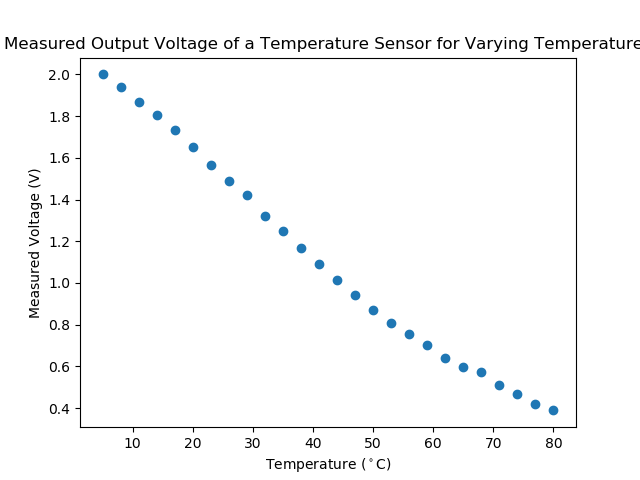

In [2]:
# Import Data
temp, voltage = np.loadtxt("Polynomial_Fitting_data.txt", unpack = True) # unpack each column of data to a seperate array

# Output data check
print("\nTemperature (Celcius):\n", temp)
print("\nMeasured Voltage (V):\n", voltage)

# Plot data
plt.plot(temp, voltage, 'o') # plot data points as circles
plt.title('Measured Output Voltage of a Temperature Sensor for Varying Temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Measured Voltage (V)');

## Fitting to a polynomial
The code below calculates the best fit polynomials of order 1-6 and outputs the coefficients and error for each order along with the number of degrees of freedom and the reduced $\chi^2$.

In [3]:
v_error = 0.006   # error in voltage measurements

n = 1   # assign polynomial order

# Loop to calculate best fit polynomials of order n
while n <= 6:  # will carry out function 6 times
    p, v = np.polyfit(temp,voltage,n,cov=True)
    print("\nPolynomial order: ", n, "\n")
    
    # Output extracted coefficients and errors from matrix of covariance
    for i in range(np.size(p)):
        print("coefficient order x^", len(p)-i-1, " is ", p[i], " with error ", np.sqrt(np.diag(v)[i]))
    
    # Calculate and output degrees of freedom and reduced chi squared
    line = np.poly1d(p) # recalculate line function for each new set of values of p
    residuals = (voltage - line(temp)) / v_error
    dof = np.size(temp) - np.size(p)      
    chi_sq = np.sum(residuals**2) / dof
    
    print("The number of degrees of freedom is: ", dof)
    print("The reduced chi squared is: ", chi_sq)
    
    n = n + 1   # increment n value


Polynomial order:  1 

coefficient order x^ 1  is  -0.022538233618233598  with error  0.0004824279688224743
coefficient order x^ 0  is  2.0729903133903127  with error  0.023199218155980757
The number of degrees of freedom is:  24
The reduced chi squared is:  85.09437242798354

Polynomial order:  2 

coefficient order x^ 2  is  0.00010653235653235627  with error  1.0434546919011565e-05
coefficient order x^ 1  is  -0.03159348392348389  with error  0.0009113488119132164
coefficient order x^ 0  is  2.2114823768823766  with error  0.01689752370283333
The number of degrees of freedom is:  23
The reduced chi squared is:  16.051055605693378

Polynomial order:  3 

coefficient order x^ 3  is  2.2156696264087213e-06  with error  2.679911652659978e-07
coefficient order x^ 2  is  -0.0001759655208347549  with error  3.457206225215076e-05
coefficient order x^ 1  is  -0.021602364877119123  with error  0.0012929723444069432
coefficient order x^ 0  is  2.1270343447414364  with error  0.013304566777576

### Analysis
A reasonable fit will output a $\chi^2$ value of approximately $1$. The polynomials of orders 4, 5 and 6 are therefore the best fits for the data since they are nearest to $1$. The polynomial of order 4 has a $\chi^2$ close to $1$ with a value of $1.0942$ without being an overly close fit and was therefore chosen to be the best fit for the data in order to predict new data points.

<IPython.core.display.Javascript object>


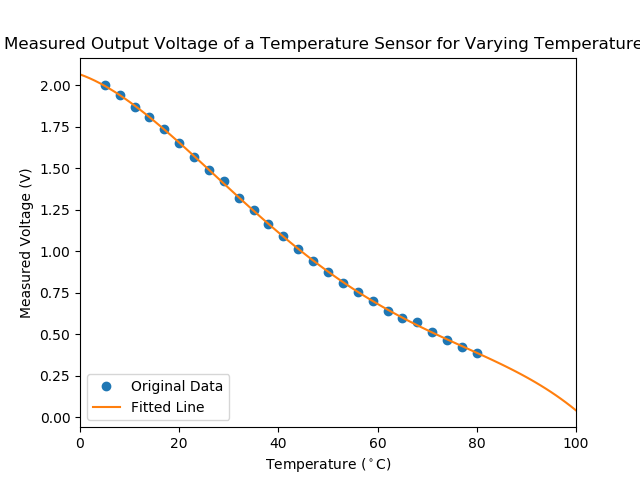

In [4]:
n=4  # polynomial order chosen to fit

# Generate coefficients for polynomial fit chosen
p, v = np.polyfit(temp, voltage, n, cov = True)
line = np.poly1d(p)

# Generate fitted data
p_temp = np.linspace(0,100,100) # 100 evenly spaced x-data points between 0 and 100
p_voltage = line(p_temp)        # function to generate value of polynomial for given x-values

# Plot original data with fitted line
plt.figure()
plt.plot(temp, voltage, 'o', label="Original Data")
plt.plot(p_temp, p_voltage, '-', label="Fitted Line")
plt.title('Measured Output Voltage of a Temperature Sensor for Varying Temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Measured Voltage (V)')
plt.legend(loc="lower left")
plt.xlim(0,100);

## Fitting the residuals to a Gaussian

<IPython.core.display.Javascript object>


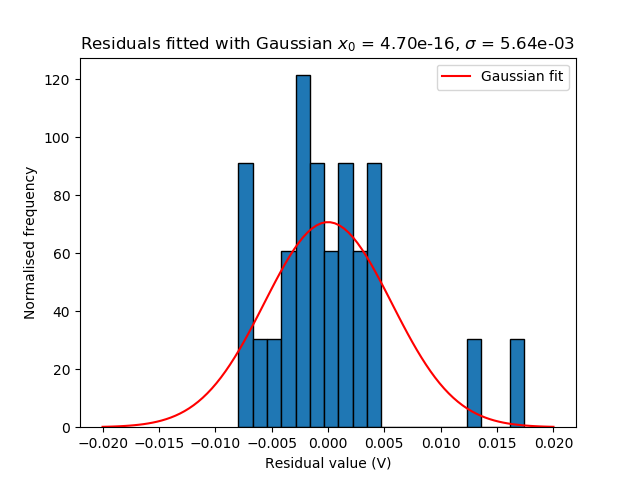

In [5]:
residuals = (voltage - line(temp))  # calculate residuals for polynomial fit chosen

# Calculate Gaussian fit for residuals
x0, sigma = stats.norm.fit(residuals) # mean and standard deviation of residuals
x = np.linspace(-0.02,0.02,100)       # 100 evenly spaced x-values from -0.02 to 0.02
y = stats.norm.pdf(x,x0,sigma)        # Gaussian fit for generated x-values

# Plot histogram of residuals with Gaussian fit
plt.figure()
plt.hist(residuals,bins=20,density=True,edgecolor='k')
plt.plot(x,y,'r-', label='Gaussian fit')
plt.legend()
plt.xlabel("Residual value (V)")
plt.ylabel("Normalised frequency")
title_label=('Residuals fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
plt.title(title_label) ;

### Analysis
The residuals, broadly speaking, follow a Gaussian distribution with an average value of $x_0 \sim 0$ and a standard deviation that is similar to the estimated experimental error of $\sigma = 0.006$. This is another indicator that the polynomial provides a good fit to the data. Therefore the errors in the data taken can be generally represented by a Gaussian distribution.